In [ ]:
#Adi Gumelar_CV A_Batch 6

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 24.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ultralytics
import cv2
import random
import os
from PIL import Image
from ultralytics import YOLO
from IPython.display import display
from glob import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
#setup variables
num_samples = 16
src_yamlfile='/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/data.yaml'
src_image_train='/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/train/images/*'
src_image_test='/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/test/images'
src_image_valid='/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/valid/images'

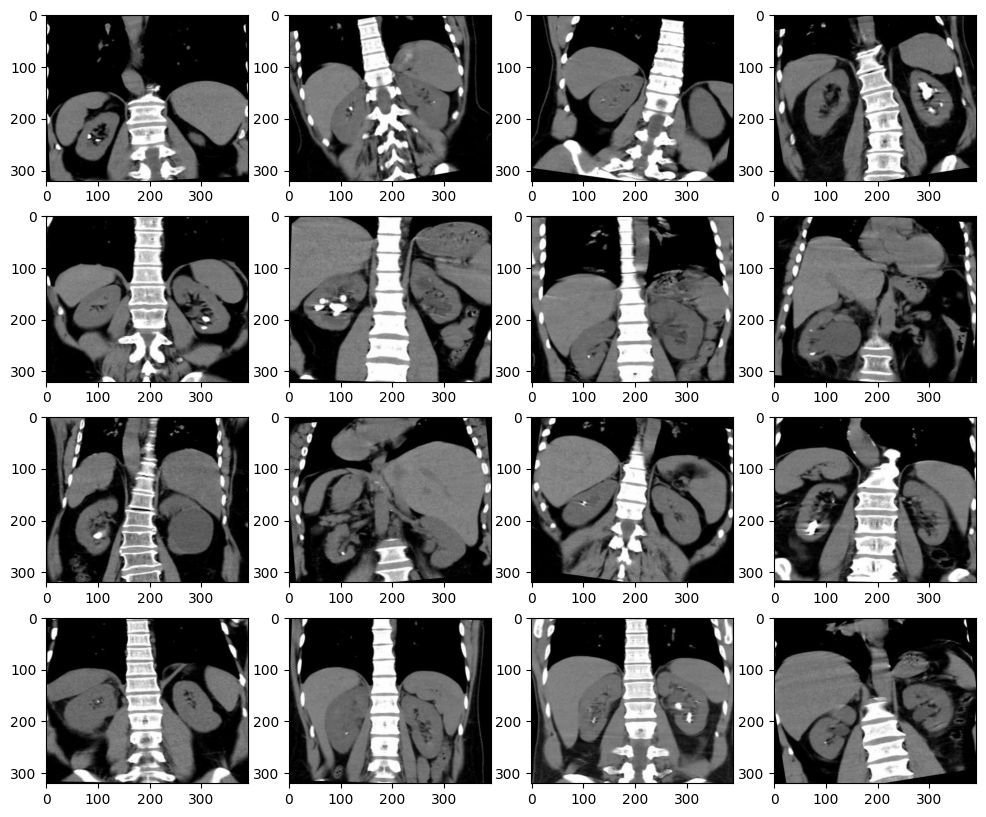

In [5]:
images_train = glob(src_image_train)
random_image = random.sample(images_train, num_samples)

plt.figure(figsize=(12,10))
for i in range(num_samples):
    plt.subplot(4,4,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('on')

In [6]:
# Choosing Yolov8
yolo_v8 = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 115MB/s]


In [7]:
num_epochs=50
batch_size=10
num_seed = 6
learning_rate = 0.001
optimizer = 'Adam'
num_worker = 2

model_yolov8 = yolo_v8.train(data=src_yamlfile, seed=num_seed, epochs=num_epochs, lr0=learning_rate, workers=num_worker, optimizer=optimizer, verbose=True, project='KidneyStone_yolov8n',name='yolo_v8')

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=KidneyStone_yolov8n, name=yolo_v8, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=6, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_

100%|██████████| 755k/755k [00:00<00:00, 20.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 112MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/train/labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to KidneyStone_yolov8n/yolo_v8/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to KidneyStone_yolov8n/yolo_v8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.22G      2.299       2.61      1.306         40        640: 100%|██████████| 66/66 [00:27<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        123        325      0.646      0.197      0.421      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.24G      2.156       1.35      1.234         47        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        123        325      0.501      0.446      0.402      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.17G      2.121      1.231      1.244         41        640: 100%|██████████| 66/66 [00:25<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        123        325      0.596      0.526      0.527      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.24G       2.09      1.204      1.248         48        640: 100%|██████████| 66/66 [00:27<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        123        325      0.631      0.595      0.547      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.17G      2.078      1.179      1.225         48        640: 100%|██████████| 66/66 [00:24<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        123        325      0.644      0.569      0.578      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.24G      2.077       1.14      1.238         38        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325      0.729      0.591      0.653      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.18G      2.038      1.122      1.212         51        640: 100%|██████████| 66/66 [00:25<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        123        325      0.699      0.615      0.637      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.25G      2.034      1.112      1.216         71        640: 100%|██████████| 66/66 [00:26<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        123        325      0.706      0.609      0.614      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.15G      2.035      1.082       1.21         41        640: 100%|██████████| 66/66 [00:23<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        123        325      0.728      0.615      0.628      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.26G      1.992      1.077      1.206         40        640: 100%|██████████| 66/66 [00:27<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        123        325      0.715      0.632      0.687       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.18G      1.979      1.057      1.186         44        640: 100%|██████████| 66/66 [00:23<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        123        325      0.774      0.622      0.647      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.26G      1.976      1.047      1.184         49        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        123        325      0.765       0.63      0.657      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.15G      1.955      1.017      1.179         37        640: 100%|██████████| 66/66 [00:24<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all        123        325      0.747      0.591      0.663      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.24G      1.962      1.018      1.176         58        640: 100%|██████████| 66/66 [00:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        123        325      0.731      0.643      0.658      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.17G       1.94     0.9935      1.192         27        640: 100%|██████████| 66/66 [00:24<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.745      0.655       0.65      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.24G       1.94      1.014      1.167         40        640: 100%|██████████| 66/66 [00:27<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        123        325      0.752      0.658      0.664      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.15G      1.946      1.002      1.175         51        640: 100%|██████████| 66/66 [00:25<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        123        325      0.705       0.66      0.648      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.27G       1.92     0.9929       1.16         46        640: 100%|██████████| 66/66 [00:23<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        123        325      0.747      0.677      0.697       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.15G      1.925     0.9699       1.15         36        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        123        325       0.76      0.652      0.697      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.24G      1.896     0.9588      1.165         41        640: 100%|██████████| 66/66 [00:24<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        123        325       0.73      0.656      0.683      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.17G      1.853      0.928      1.142         48        640: 100%|██████████| 66/66 [00:27<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        123        325      0.735      0.665      0.687      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.26G      1.857     0.9274      1.141         36        640: 100%|██████████| 66/66 [00:24<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        123        325      0.746      0.641       0.68      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.23G      1.906     0.9484       1.14         44        640: 100%|██████████| 66/66 [00:27<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        123        325      0.772      0.686      0.702      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.24G      1.837     0.9328      1.146         65        640: 100%|██████████| 66/66 [00:24<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.791      0.643      0.685      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.15G      1.858     0.9437      1.137         44        640: 100%|██████████| 66/66 [00:29<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        123        325      0.691      0.646      0.662      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.26G      1.886     0.9435      1.142         54        640: 100%|██████████| 66/66 [00:24<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        123        325      0.773      0.607      0.677      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.17G       1.86     0.9412      1.115         55        640: 100%|██████████| 66/66 [00:28<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        123        325      0.762      0.665      0.699      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.23G       1.84     0.9115      1.101         21        640: 100%|██████████| 66/66 [00:24<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        123        325      0.747      0.665       0.66      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.15G      1.819     0.8994      1.115         34        640: 100%|██████████| 66/66 [00:27<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        123        325      0.782      0.702      0.734      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.24G      1.796     0.8659      1.116         33        640: 100%|██████████| 66/66 [00:24<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        123        325      0.724      0.689      0.709      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.15G      1.844     0.8779      1.117         55        640: 100%|██████████| 66/66 [00:27<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        123        325       0.76      0.655      0.679      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.25G      1.794     0.8715      1.092         41        640: 100%|██████████| 66/66 [00:24<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        123        325      0.772      0.637      0.696      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.17G      1.754     0.8469      1.096         58        640: 100%|██████████| 66/66 [00:27<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        123        325      0.736      0.695      0.712      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.23G       1.76      0.848      1.097         30        640: 100%|██████████| 66/66 [00:27<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        123        325      0.747      0.686      0.712      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.17G      1.755     0.8385      1.087         42        640: 100%|██████████| 66/66 [00:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        123        325      0.759      0.698      0.749      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.25G      1.786     0.8547      1.091         44        640: 100%|██████████| 66/66 [00:23<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        123        325      0.762      0.698       0.72      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.18G      1.718     0.8268      1.084         67        640: 100%|██████████| 66/66 [00:25<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        123        325      0.758      0.654      0.668      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.24G      1.754     0.8391      1.093         53        640: 100%|██████████| 66/66 [00:24<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all        123        325      0.794      0.713      0.734      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.15G      1.743     0.8259      1.068         69        640: 100%|██████████| 66/66 [00:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        123        325      0.768      0.689      0.729      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.24G      1.731     0.8281      1.078         62        640: 100%|██████████| 66/66 [00:23<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        123        325      0.763      0.712      0.729      0.285


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.21G      1.711     0.8039      1.094         18        640: 100%|██████████| 66/66 [00:27<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        123        325      0.772      0.705      0.747      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.22G      1.682     0.7944      1.088         28        640: 100%|██████████| 66/66 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        123        325      0.763      0.714      0.744      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.13G      1.698     0.7971      1.095         31        640: 100%|██████████| 66/66 [00:25<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        123        325      0.754      0.707      0.732       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.23G      1.687     0.7788      1.097         27        640: 100%|██████████| 66/66 [00:23<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all        123        325      0.779      0.695      0.728      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.13G      1.671     0.7722       1.08         26        640: 100%|██████████| 66/66 [00:24<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        123        325      0.781      0.711      0.739      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.22G       1.64     0.7563      1.078         30        640: 100%|██████████| 66/66 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        123        325      0.772       0.72      0.725      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.17G      1.628      0.749      1.079         32        640: 100%|██████████| 66/66 [00:23<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        123        325      0.793      0.723      0.759       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.22G       1.63     0.7486      1.062         23        640: 100%|██████████| 66/66 [00:24<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        123        325      0.784      0.714      0.742      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.15G      1.613     0.7459      1.053         29        640: 100%|██████████| 66/66 [00:23<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        123        325      0.786      0.717      0.746      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.24G      1.616     0.7406       1.06         24        640: 100%|██████████| 66/66 [00:25<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        123        325      0.794      0.723      0.744      0.297



50 epochs completed in 0.398 hours.
Optimizer stripped from KidneyStone_yolov8n/yolo_v8/weights/last.pt, 6.2MB
Optimizer stripped from KidneyStone_yolov8n/yolo_v8/weights/best.pt, 6.2MB

Validating KidneyStone_yolov8n/yolo_v8/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


                   all        123        325      0.769      0.702      0.747      0.315
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to KidneyStone_yolov8n/yolo_v8


In [8]:
def kidneystone_detection(img_path, model):
    img = cv2.imread(img_path)
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    return detect_img

def show_single_image(img_file, model_trained):
    # Load the current image and run object detection
    detect_img = kidneystone_detection(img_file, model_trained)

    # Create a figure and axis for a single image
    fig, ax = plt.subplots(figsize=(5,5))

    # Plot the current image
    ax.imshow(detect_img)
    ax.axis('off')

    plt.show()

def show_train_and_validation_graphs(result):
    result.columns = result.columns.str.strip()

    epoch_column = result['epoch']
    box_train_losses = result['train/box_loss']
    box_val_losses = result['val/box_loss']
    cls_train_losses = result['train/cls_loss']
    cls_val_losses = result['val/cls_loss']
    dfl_train_losses = result['train/dfl_loss']
    dfl_val_losses = result['val/dfl_loss']

    plt.figure(figsize=(20,10))
    plt.style.use('ggplot')
    plt.subplot(1,3,1)
    plt.plot(epoch_column, box_train_losses, label='train_loss')
    plt.plot(epoch_column, box_val_losses, label='val_loss')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Box Losses')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(epoch_column, cls_train_losses, label='train_loss')
    plt.plot(epoch_column, cls_val_losses, label='val_loss')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Class Losses')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(epoch_column, dfl_train_losses, label='train_loss')
    plt.plot(epoch_column, dfl_val_losses, label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Distribution Focal Loss')
    plt.title('Train and Validation Distribution Focal Losses (OM/OO)')
    plt.legend()
    plt.show()

In [9]:
df_testing = os.listdir(src_image_test)

In [10]:
selected_images = random.sample(df_testing, 16)

In [11]:
model_yolov8_trained = YOLO('/content/KidneyStone_yolov8n/yolo_v8/weights/best.pt')


0: 544x640 1 Tas_Var, 49.3ms
Speed: 2.8ms preprocess, 49.3ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 22.7ms
Speed: 7.3ms preprocess, 22.7ms inference, 3.9ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 14.2ms
Speed: 3.9ms preprocess, 14.2ms inference, 4.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 10.9ms
Speed: 2.8ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 9.6ms
Speed: 3.5ms preprocess, 9.6ms inference, 2.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 10.9ms
Speed: 2.7ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 10.7ms
Speed: 5.1ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 4 Tas_Vars, 9.2ms
Speed: 2.7ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1

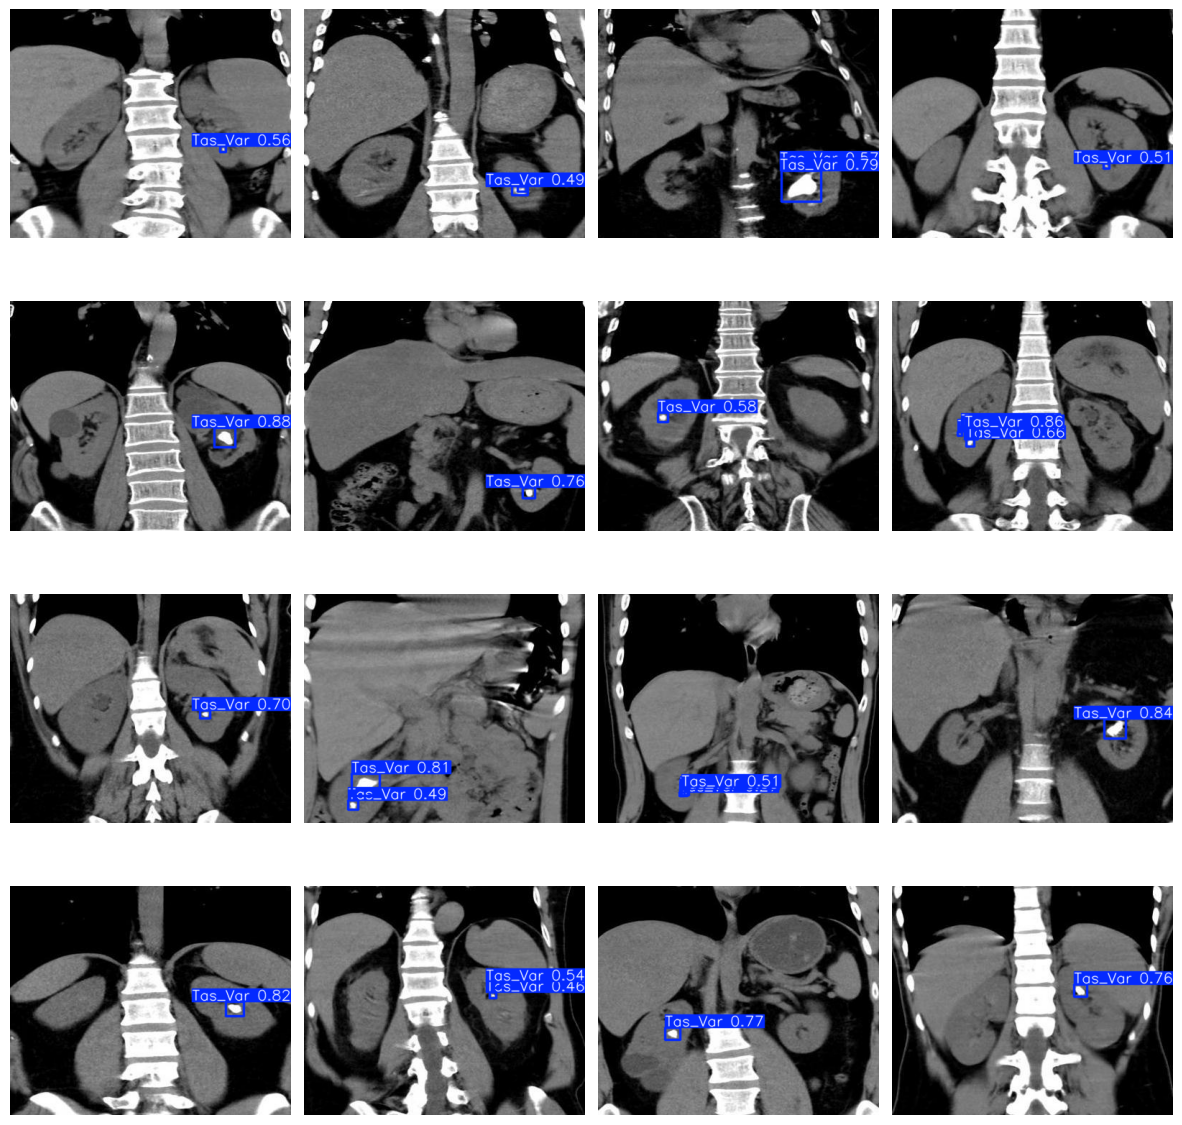

In [12]:
# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(src_image_test, img_file)
    detect_img = kidneystone_detection(img_path, model_yolov8_trained)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [13]:
results = pd.read_csv('/content/KidneyStone_yolov8n/yolo_v8/results.csv') # need define directory
results #results.columns

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,35.9482,2.29935,2.60957,1.30625,0.64646,0.19692,0.42132,0.16334,2.39626,4.03701,1.38873,0.067500,0.000328,0.000328
1,2,65.8628,2.15625,1.34952,1.23367,0.50081,0.44615,0.40244,0.13927,2.31558,1.44685,1.28184,0.034487,0.000649,0.000649
2,3,93.1713,2.12066,1.23100,1.24388,0.59598,0.52615,0.52696,0.21088,2.09978,1.21127,1.19511,0.001461,0.000956,0.000956
3,4,123.2700,2.08954,1.20357,1.24758,0.63101,0.59459,0.54650,0.20617,2.06584,1.26813,1.22523,0.000941,0.000941,0.000941
4,5,150.1950,2.07781,1.17898,1.22533,0.64384,0.56923,0.57768,0.22682,2.10350,1.32905,1.19246,0.000921,0.000921,0.000921
5,6,180.0410,2.07696,1.14006,1.23755,0.72949,0.59077,0.65303,0.24653,1.97770,1.10376,1.15519,0.000901,0.000901,0.000901
6,7,210.0140,2.03782,1.12233,1.21176,0.69892,0.61538,0.63698,0.24662,2.03609,1.10558,1.16928,0.000881,0.000881,0.000881
7,8,239.2530,2.03375,1.11207,1.21564,0.70598,0.60923,0.61403,0.24074,2.02680,1.09997,1.16403,0.000861,0.000861,0.000861
8,9,266.0680,2.03515,1.08227,1.21019,0.72756,0.61538,0.62783,0.22814,2.07169,1.08775,1.18411,0.000842,0.000842,0.000842
9,10,296.3590,1.99169,1.07673,1.20553,0.71474,0.63218,0.68749,0.26040,2.03898,1.06225,1.17237,0.000822,0.000822,0.000822


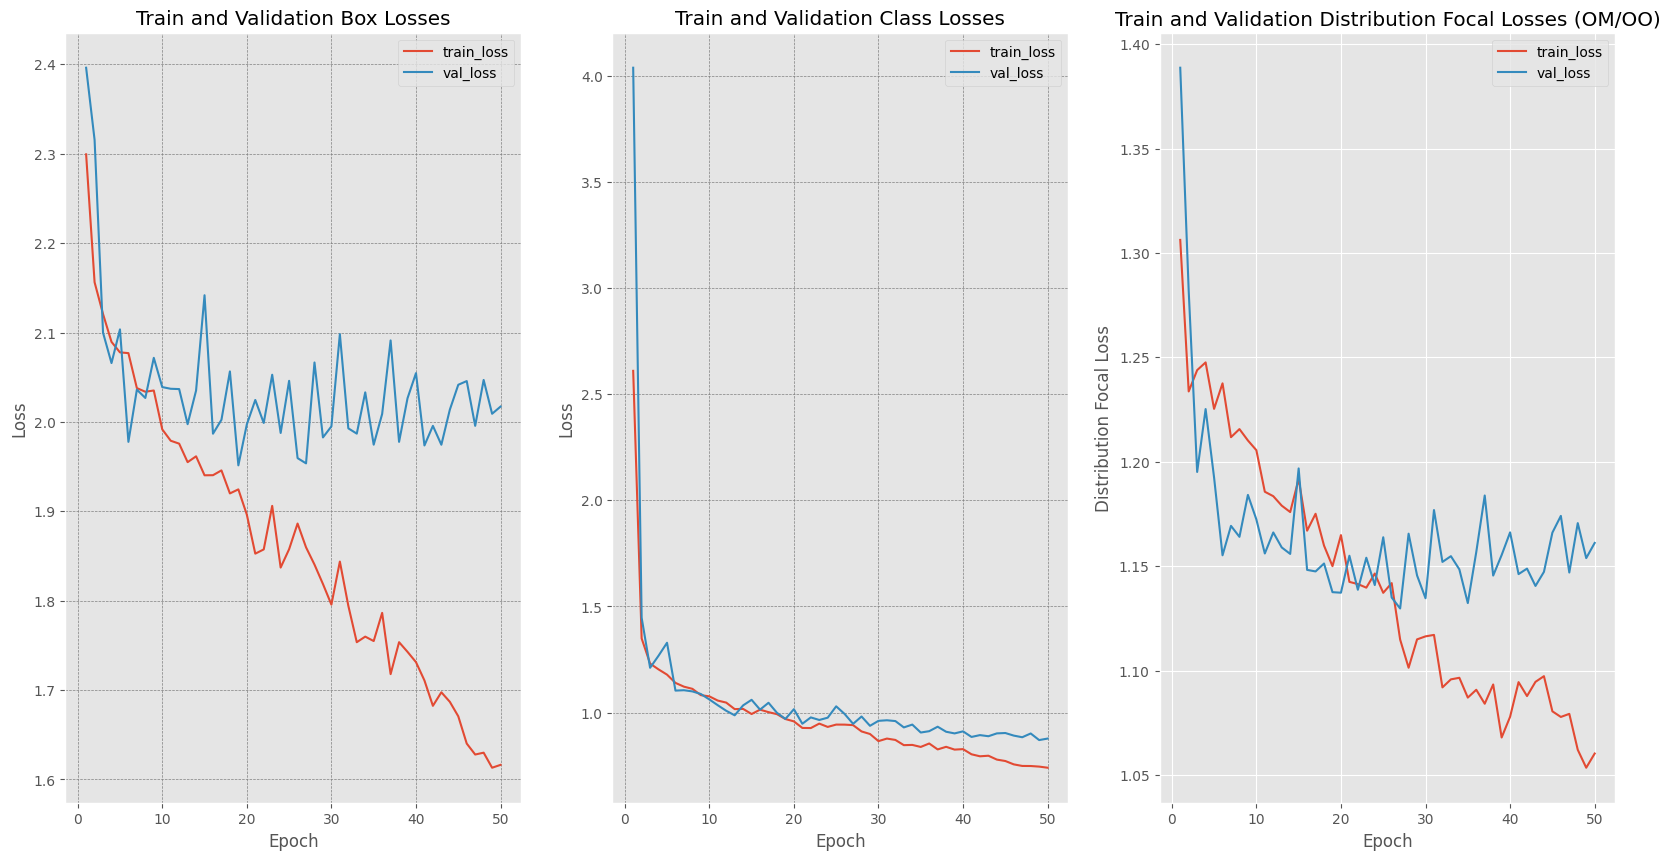

In [14]:
show_train_and_validation_graphs(results)

(-0.5, 2399.5, 1199.5, -0.5)

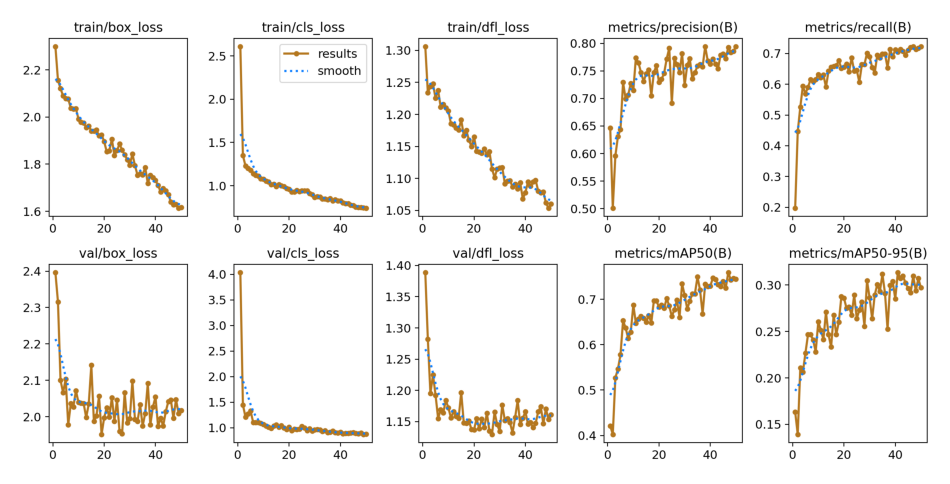

In [15]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/content/KidneyStone_yolov8n/yolo_v8/results.png'))
plt.axis('off')

(-0.5, 2249.5, 1499.5, -0.5)

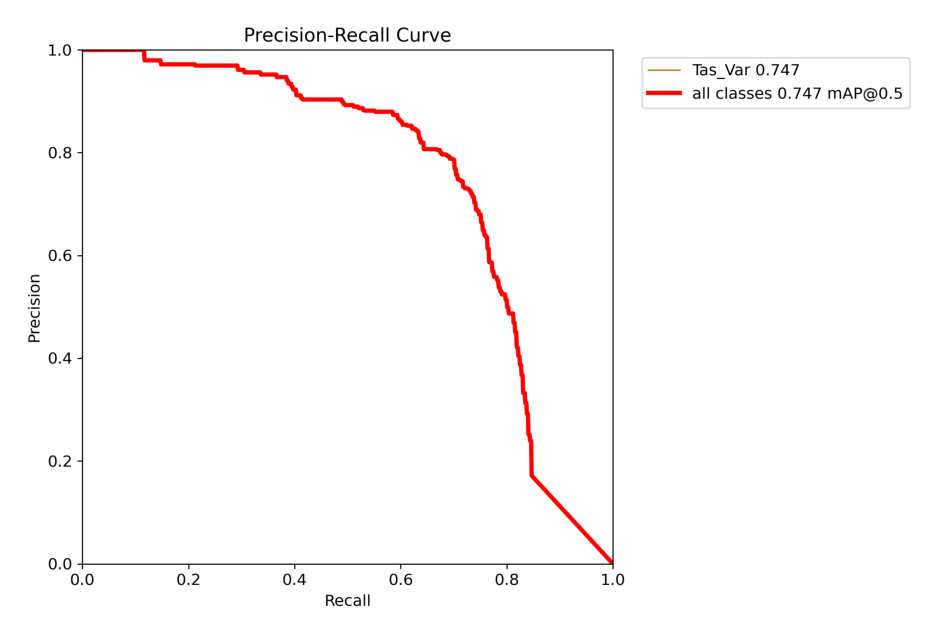

In [16]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/content/KidneyStone_yolov8n/yolo_v8/PR_curve.png')) #need define directory
plt.axis('off')

In [17]:
# this need to be act as parameter input when run on deploy mode
single_image = src_image_valid + '/1-3-46-670589-33-1-63737661477473189500001-5463064330587912766_png_jpg.rf.72d5fd49b7ea305b3167bb1d7ac8dbc7.jpg' #need check directory

In [20]:
y = model_yolov8_trained.predict(single_image)

print(type(y))


image 1/1 /content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/valid/images/1-3-46-670589-33-1-63737661477473189500001-5463064330587912766_png_jpg.rf.72d5fd49b7ea305b3167bb1d7ac8dbc7.jpg: 544x640 1 Tas_Var, 9.7ms
Speed: 3.1ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)
<class 'list'>



0: 544x640 1 Tas_Var, 9.2ms
Speed: 3.4ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


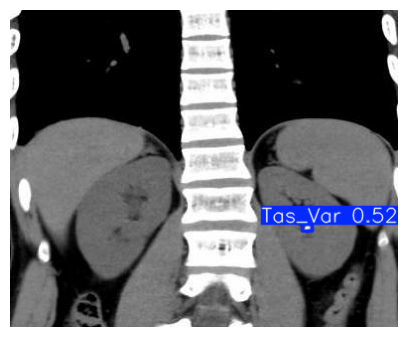

In [21]:
show_single_image(single_image, model_yolov8_trained)

In [24]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!zip -r /content/KidneyStone_yolov8n.zip /content/KidneyStone_yolov8n

  adding: content/KidneyStone_yolov8n/ (stored 0%)
  adding: content/KidneyStone_yolov8n/yolo_v8/ (stored 0%)
  adding: content/KidneyStone_yolov8n/yolo_v8/val_batch0_pred.jpg (deflated 10%)
  adding: content/KidneyStone_yolov8n/yolo_v8/train_batch2640.jpg (deflated 11%)
  adding: content/KidneyStone_yolov8n/yolo_v8/P_curve.png (deflated 18%)
  adding: content/KidneyStone_yolov8n/yolo_v8/results.png (deflated 7%)
  adding: content/KidneyStone_yolov8n/yolo_v8/val_batch1_pred.jpg (deflated 9%)
  adding: content/KidneyStone_yolov8n/yolo_v8/train_batch2.jpg (deflated 6%)
  adding: content/KidneyStone_yolov8n/yolo_v8/weights/ (stored 0%)
  adding: content/KidneyStone_yolov8n/yolo_v8/weights/last.pt (deflated 9%)
  adding: content/KidneyStone_yolov8n/yolo_v8/weights/best.pt (deflated 9%)
  adding: content/KidneyStone_yolov8n/yolo_v8/args.yaml (deflated 51%)
  adding: content/KidneyStone_yolov8n/yolo_v8/F1_curve.png (deflated 17%)
  adding: content/KidneyStone_yolov8n/yolo_v8/val_batch2_pred.